In [1]:
from sympy import *
from sympy.physics.mechanics import *

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = '\ffmpeg\ffmpeg-2024-11-13-git-322b240cea-full_build\bin'

init_vprinting()

In [9]:
m, g, ell, t = symbols('m g ell t')
theta, phi = dynamicsymbols('theta phi')

xm = ell*sin(theta)*cos(phi)
ym = ell*sin(theta)*sin(phi)
zm = -ell*cos(theta)

xm_dot = diff(xm, t)
ym_dot = diff(ym, t)
zm_dot = diff(zm, t)

theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)

phi_dot = diff(phi, t)
phi_ddot = diff(phi_dot, t)


K = 0.5*m*(xm_dot**2 + ym_dot**2 + zm_dot**2)
P = m*g*zm
tau = 2 *sin(0.5 * t)
L = K - P
L, K, P

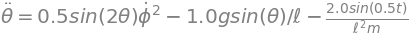

In [12]:
#Euler-Lagrange equation
eqn = diff(diff(L, theta_dot), t) - diff(L, theta)
eqn2 = diff(diff(L, phi_dot), t) - diff(L, phi)
sln = solve([eqn+tau], (theta_ddot), simplify=True, rational=False)
Eq((theta_ddot), (sln[theta_ddot]))


In [13]:
x = Matrix([theta, theta_dot])
x_dot = diff(x, t)
Eq(x_dot, Matrix([theta_dot, sln[theta_ddot]]))

      ⎡                       θ̇                       ⎤
      ⎢                                               ⎥
⎡θ̇⎤   ⎢              2   1.0⋅g⋅sin(θ)   2.0⋅sin(0.5⋅t)⎥
⎢ ⎥ = ⎢0.5⋅sin(2⋅θ)⋅φ̇  - ──────────── - ──────────────⎥
⎣θ̈⎦   ⎢                      ell               2      ⎥
      ⎣                                     ell ⋅m    ⎦

# Simulation

In [14]:
g = 9.81
ell = 1

theta0 = np.deg2rad(30)
theta_dot0 = 0

# phi0 = np.deg2rad(15)
# phi_dot0 = 0

def pendulum_ODE(t, y):
    return (y[1], -g*np.sin(y[0])/ell)

sol = solve_ivp(pendulum_ODE, [0, 5], (theta0, theta_dot0),
    t_eval = np.linspace(0, 5, 30*5))

theta = sol.y[0]
theta_dot = sol.y[1]
t = sol.t

theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

np.savetxt('pend.csv', np.transpose([theta_deg, theta_dot_deg]), delimiter = ',')


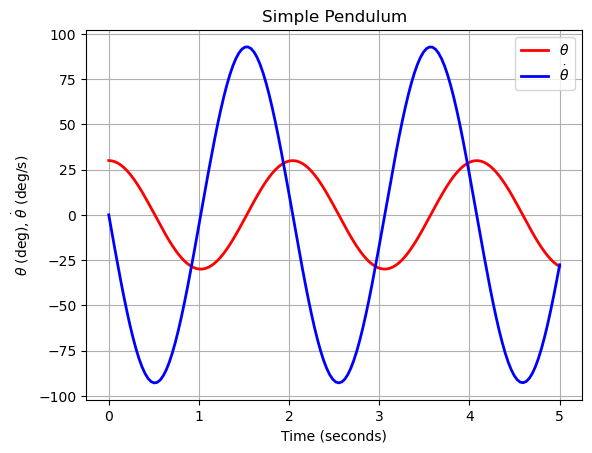

In [6]:
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$') 
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified

Error in callback <function _draw_all_if_interactive at 0x0000024C9E0EB060> (for post_execute), with arguments args (),kwargs {}:


AttributeError: 'list' object has no attribute 'set_data'

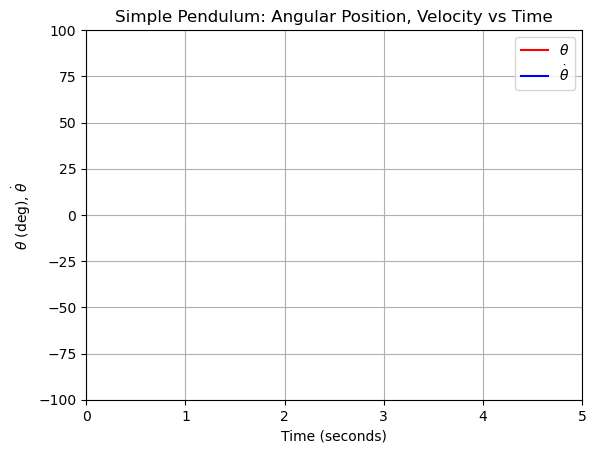

In [7]:
fig, ax = plt.subplots()

theta_curve = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])


ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
ani.save('time_domain.mp4', writer=ffmpeg_writer)

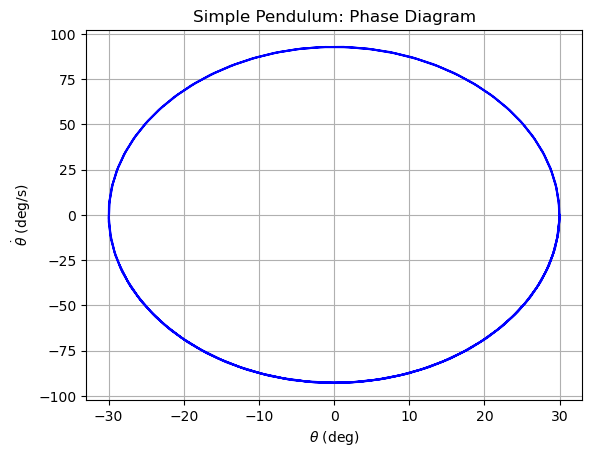

In [ ]:
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')   
plt.ylabel(r'$\dot \theta$ (deg/s)')
plt.grid()
plt.show()


TypeError: unsupported operand type(s) for *: 'int' and 'module'

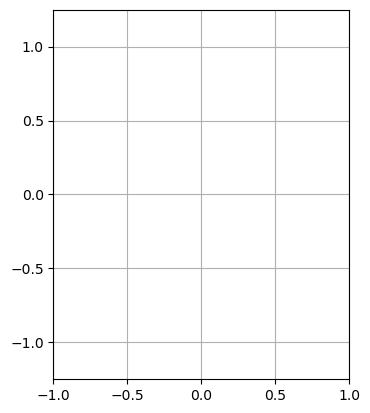

In [ ]:
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np*cos(theta))

fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 1.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

 
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('pend.gif', writer=ffmpeg_writer)

damping forces friction potential 
physical pendulum 
6dof robot manipulator

recursive algorithms 
n - E 
lagrangian 
hamiltonian
double link pendulum 


kane's 
bobkov
anderson
featherstone's 6d



physical  single link 

math double 
phys double link 

odin's paper 
recursive n-e